# Naive Bayes- Spam detection

Exercise statement: SPAM Detection
The construction of a machine learning system capable of predicting whether a given email corresponds to a SPAM email or not is proposed. To do so, the following set of data will be used:

2007 TREC Public Spam Corpus

The corpus trec07p contains 75,419 messages:

25220 ham
50199 spam
These messages constitute all the messages delivered to a particular server between these dates:

Sun, 8 Apr 2007 13:07:21 -0400
Fri, 6 Jul 2007 07:04:53 -0400



1. Auxiliary Functions

In [14]:
# This class facilitates the preprocessing of emails that have HTML code
from html.parser import HTMLParser

class HTMLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []

    def handle_data(self, d):
        self.fed.append(d)

    def get_data(self):
        return ''.join(self.fed)

In [15]:
def strip_tags(html):
    s = HTMLStripper()
    s.feed(html)
    return s.get_data()

In [16]:
t = '<tr><td align="left"><a href="../../issues/51/16.html#article">Phrack World News</a></td>'
strip_tags(t)

'Phrack World News'

In [50]:
import email
import string
import nltk

class Parser:

    def __init__(self):
        self.stemmer = nltk.PorterStemmer()
        self.stopwords = set(nltk.corpus.stopwords.words('english'))
        self.punctuation = list(string.punctuation)

    def parse(self, email_path):
        """Parse an email."""
        with open(email_path, errors='ignore') as e:
            msg = email.message_from_file(e)
        return None if not msg else self.get_email_content(msg)

    def get_email_content(self, msg):
        """Extract the email content."""
        subject = self.tokenize(msg['Subject']) if msg['Subject'] else []
        body = self.get_email_body(msg.get_payload(),
                                   msg.get_content_type())
        content_type = msg.get_content_type()
        # Returning the content of the email
        return {"subject": subject,
                "body": body,
                "content_type": content_type}

    def get_email_body(self, payload, content_type):
        """Extract the body of the email."""
        body = []
        if type(payload) is str and content_type == 'text/plain':
            return self.tokenize(payload)
        elif type(payload) is str and content_type == 'text/html':
            return self.tokenize(strip_tags(payload))
        elif type(payload) is list:
            for p in payload:
                body += self.get_email_body(p.get_payload(),
                                            p.get_content_type())
        return body

    def tokenize(self, text):
        """Transform a text string in tokens. Perform two main actions,
        clean the punctuation symbols and do stemming of the text."""
        for c in self.punctuation:
            text = text.replace(c, "")
        text = text.replace("\t", " ")
        text = text.replace("\n", " ")
        tokens = list(filter(None, text.split(" ")))
        # Stemming of the tokens
        return [self.stemmer.stem(w) for w in tokens if w not in self.stopwords]

Reading an email in raw format

In [18]:
import os

# We get the absolute path of the current file
current_directory = os.getcwd()

file_path = os.path.join(current_directory, "datasets", "trec07p", "data", "inmail.1")

print("Ruta absoluta del archivo:", file_path)

Ruta absoluta del archivo: C:\Users\Laila\Desktop\Proyecto\Algorithms\datasets\trec07p\data\inmail.1


In [37]:
file_path = "datasets/trec07p/data/inmail.1"

try:
    with open(file_path, "r") as file:
        inmail = file.read()
    print(inmail)
except Exception as e:
    print("Error:", e)


From RickyAmes@aol.com  Sun Apr  8 13:07:32 2007
Return-Path: <RickyAmes@aol.com>
Received: from 129.97.78.23 ([211.202.101.74])
	by speedy.uwaterloo.ca (8.12.8/8.12.5) with SMTP id l38H7G0I003017;
	Sun, 8 Apr 2007 13:07:21 -0400
Received: from 0.144.152.6 by 211.202.101.74; Sun, 08 Apr 2007 19:04:48 +0100
Message-ID: <WYADCKPDFWWTWTXNFVUE@yahoo.com>
From: "Tomas Jacobs" <RickyAmes@aol.com>
Reply-To: "Tomas Jacobs" <RickyAmes@aol.com>
To: the00@speedy.uwaterloo.ca
Subject: Generic Cialis, branded quality@ 
Date: Sun, 08 Apr 2007 21:00:48 +0300
X-Mailer: Microsoft Outlook Express 6.00.2600.0000
MIME-Version: 1.0
Content-Type: multipart/alternative;
	boundary="--8896484051606557286"
X-Priority: 3
X-MSMail-Priority: Normal
Status: RO
Content-Length: 988
Lines: 24

----8896484051606557286
Content-Type: text/html;
Content-Transfer-Encoding: 7Bit

<html>
<body bgcolor="#ffffff">
<div style="border-color: #00FFFF; border-right-width: 0px; border-bottom-width: 0px; margin-bottom: 0px;" align="

Parsing 

In [38]:
p = Parser()
p.parse("datasets/trec07p/data/inmail.1")

{'subject': ['gener', 'ciali', 'brand', 'qualiti'],
 'body': ['do',
  'feel',
  'pressur',
  'perform',
  'rise',
  'occas',
  'tri',
  'viagra',
  'anxieti',
  'thing',
  'past',
  'back',
  'old',
  'self'],
 'content_type': 'multipart/alternative'}

In [40]:
index = open("datasets/trec07p/full/index").readlines()
index 

['spam ../data/inmail.1\n',
 'ham ../data/inmail.2\n',
 'spam ../data/inmail.3\n',
 'spam ../data/inmail.4\n',
 'spam ../data/inmail.5\n',
 'spam ../data/inmail.6\n',
 'spam ../data/inmail.7\n',
 'spam ../data/inmail.8\n',
 'spam ../data/inmail.9\n',
 'ham ../data/inmail.10\n',
 'spam ../data/inmail.11\n',
 'spam ../data/inmail.12\n',
 'spam ../data/inmail.13\n',
 'spam ../data/inmail.14\n',
 'spam ../data/inmail.15\n',
 'spam ../data/inmail.16\n',
 'spam ../data/inmail.17\n',
 'spam ../data/inmail.18\n',
 'spam ../data/inmail.19\n',
 'ham ../data/inmail.20\n',
 'ham ../data/inmail.21\n',
 'spam ../data/inmail.22\n',
 'spam ../data/inmail.23\n',
 'spam ../data/inmail.24\n',
 'spam ../data/inmail.25\n',
 'spam ../data/inmail.26\n',
 'spam ../data/inmail.27\n',
 'spam ../data/inmail.28\n',
 'ham ../data/inmail.29\n',
 'spam ../data/inmail.30\n',
 'ham ../data/inmail.31\n',
 'spam ../data/inmail.32\n',
 'spam ../data/inmail.33\n',
 'ham ../data/inmail.34\n',
 'spam ../data/inmail.35\n',
 

In [41]:
import os

DATASET_PATH = os.path.join("datasets", "trec07p")

def parse_index(path_to_index, n_elements):
    ret_indexes = []
    index = open(path_to_index).readlines()
    for i in range(n_elements):
        mail = index[i].split(" ../")
        label = mail[0]
        path = mail[1][:-1]
        path_mail = path.split("/")[-1]
        ret_indexes.append({"label":label, "email_path":os.path.join(DATASET_PATH, os.path.join("data", path_mail))})
    return ret_indexes

In [52]:
def parse_email(index):
    p = Parser()
    pmail = p.parse(index["email_path"])
    return pmail, index["label"]

In [53]:
indexes = parse_index("datasets/trec07p/full/index", 10)
indexes
                      

[{'label': 'spam', 'email_path': 'datasets\\trec07p\\data\\inmail.1'},
 {'label': 'ham', 'email_path': 'datasets\\trec07p\\data\\inmail.2'},
 {'label': 'spam', 'email_path': 'datasets\\trec07p\\data\\inmail.3'},
 {'label': 'spam', 'email_path': 'datasets\\trec07p\\data\\inmail.4'},
 {'label': 'spam', 'email_path': 'datasets\\trec07p\\data\\inmail.5'},
 {'label': 'spam', 'email_path': 'datasets\\trec07p\\data\\inmail.6'},
 {'label': 'spam', 'email_path': 'datasets\\trec07p\\data\\inmail.7'},
 {'label': 'spam', 'email_path': 'datasets\\trec07p\\data\\inmail.8'},
 {'label': 'spam', 'email_path': 'datasets\\trec07p\\data\\inmail.9'},
 {'label': 'ham', 'email_path': 'datasets\\trec07p\\data\\inmail.10'}]

2. Data set data preprocessing

In [54]:
index = parse_index("datasets/trec07p/full/index", 1)

In [55]:
open(index[0]["email_path"]).read()

'From RickyAmes@aol.com  Sun Apr  8 13:07:32 2007\nReturn-Path: <RickyAmes@aol.com>\nReceived: from 129.97.78.23 ([211.202.101.74])\n\tby speedy.uwaterloo.ca (8.12.8/8.12.5) with SMTP id l38H7G0I003017;\n\tSun, 8 Apr 2007 13:07:21 -0400\nReceived: from 0.144.152.6 by 211.202.101.74; Sun, 08 Apr 2007 19:04:48 +0100\nMessage-ID: <WYADCKPDFWWTWTXNFVUE@yahoo.com>\nFrom: "Tomas Jacobs" <RickyAmes@aol.com>\nReply-To: "Tomas Jacobs" <RickyAmes@aol.com>\nTo: the00@speedy.uwaterloo.ca\nSubject: Generic Cialis, branded quality@ \nDate: Sun, 08 Apr 2007 21:00:48 +0300\nX-Mailer: Microsoft Outlook Express 6.00.2600.0000\nMIME-Version: 1.0\nContent-Type: multipart/alternative;\n\tboundary="--8896484051606557286"\nX-Priority: 3\nX-MSMail-Priority: Normal\nStatus: RO\nContent-Length: 988\nLines: 24\n\n----8896484051606557286\nContent-Type: text/html;\nContent-Transfer-Encoding: 7Bit\n\n<html>\n<body bgcolor="#ffffff">\n<div style="border-color: #00FFFF; border-right-width: 0px; border-bottom-width: 0

In [56]:
#Parsear first email
mail,label = parse_email(index[0])
print ("El correo es:", label)
print(email)

El correo es: spam
<module 'email' from 'C:\\Users\\Laila\\.conda\\envs\\Laila1\\Lib\\email\\__init__.py'>


#The Naive Bayes algorithm is not capable of ingesting text as part of the data set. Therefore, a series of additional functions must be applied that transform the text of the parsed emails into a numerical representation.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Preapración del email en una cadena de texto
prep_email = [" ".join(mail['subject']) + " ".join(mail['body'])]

vectorizer = CountVectorizer()
X = vectorizer.fit(prep_email)

print("Features:\n", vectorizer.get_feature_names_out())

Features:
 ['anxieti' 'back' 'brand' 'ciali' 'feel' 'gener' 'occas' 'old' 'past'
 'perform' 'pressur' 'qualitido' 'rise' 'self' 'thing' 'tri' 'viagra']


In [62]:
X = vectorizer.transform(prep_email)
print("\nValues:\n", X.toarray())


Values:
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [63]:
from sklearn.preprocessing import OneHotEncoder

prep_email = [[w] for w in mail['subject'] + mail['body']]

enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(prep_email)

print("Features:\n", enc.get_feature_names_out())
print("\nValues:\n", X.toarray())

Features:
 ['x0_anxieti' 'x0_back' 'x0_brand' 'x0_ciali' 'x0_do' 'x0_feel' 'x0_gener'
 'x0_occas' 'x0_old' 'x0_past' 'x0_perform' 'x0_pressur' 'x0_qualiti'
 'x0_rise' 'x0_self' 'x0_thing' 'x0_tri' 'x0_viagra']

Values:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [64]:
def create_prep_datasets(index_path, n_elements):
    X = []
    y = []
    indexes = parse_index(index_path, n_elements)
    for i in range(n_elements):
        print("\rParsing email: {0}".format(i+1), end='')
        try:
            mail, label = parse_email(indexes[i])
            email_text = " ".join(mail['subject']) + " " + " ".join(mail['body'])
            X.append(email_text)
            y.append(label)
        except Exception as e:
            print(f"\nError parsing email {i+1}: {e}")
            pass
    return X, y

3. Algorithm Training

In [66]:
X_train, y_train = create_prep_datasets("datasets/trec07p/full/index", 100)
X_train

Parsing email: 100

['gener ciali brand qualiti do feel pressur perform rise occas tri viagra anxieti thing past back old self',
 'typo debianreadm hi ive updat gulu i check mirror it seem littl typo debianreadm file exampl httpgulususherbrookecadebianreadm ftpftpfrdebianorgdebianreadm test lenni access releas diststest the current test develop snapshot name etch packag test unstabl pass autom test propog releas etch replac lenni like readmehtml yan morin consult en logiciel libr yanmorinsavoirfairelinuxcom 5149941556 to unsubscrib email debianmirrorsrequestlistsdebianorg subject unsubscrib troubl contact listmasterlistsdebianorg',
 'authent viagra mega authenticv i a g r a discount pricec i a l i s discount pricedo miss it click httpwwwmoujsjkhchumcom authent viagra mega authenticv i a g r a discount pricec i a l i s discount pricedo miss it click',
 'nice talk ya hey billi realli fun go night talk said felt insecur manhood i notic toilet quit small area worri websit i tell secret weapon extra 3 inch tru

In [67]:
vecttorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [70]:
print(X_train.toarray())
print("\nFeatures:", len(vectorizer.get_feature_names_out()))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Features: 4956


In [71]:
import pandas as pd
pd.DataFrame(X_train.toarray(), columns = [vectorizer.get_feature_names_out()])

,0000,000000,00085,002,003,00450,009,01,01000u,0107,...,õôõôèõéï,ö¹,öð,öôööµæ,öø³ðåµ,öþ,öˆ,úàí,þîñòµ¼,šè
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y_train


['spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam']

In [74]:
from sklearn.naive_bayes import BernoulliNB

nb_clf = BernoulliNB(alpha=1.0e-10)
nb_clf.fit(X_train, y_train)

BernoulliNB(alpha=1e-10)

4. Prediction

In [75]:
X, y = create_prep_datasets("datasets/trec07p/full/index", 500)
X_test = X[100:]
y_test = y[100:]

Parsing email: 128
Error parsing email 128: [Errno 22] Invalid argument: 'datasets\\trec07p\\data\\inmail.128'
Parsing email: 500

In [76]:
X_test = vectorizer.transform(X_test)

In [77]:
y_pred = nb_clf.predict(X_test)
y_pred

array(['spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham',
       'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
       'spam

In [78]:
print("\nReal Labels:\n", y_test)


Real Labels:
 ['spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam

In [81]:
from sklearn.metrics import f1_score
print('F1 score: {:.3f}'.format(f1_score(y_test, y_pred, pos_label='ham')))

F1 score: 0.724


As my data set increases, the F1 score improves the result

5. Graphical representation of the decision limit

In [82]:
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.gridspec as gridspec

def plot_decision_boundary(X, y, clf):
    mins = X.min(axis=0) - 0.5
    maxs = X.max(axis=0) + 0.5  

    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 71),
                     np.linspace(mins[1], maxs[1], 81))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    
    gs = gridspec.GridSpec(1, 2)
    gs.update(hspace=0.8)
    
    ax = plt.subplot(gs[0])
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.')
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], 'b.')
    
    ax = plt.subplot(gs[1])
    ax.contour(xx, yy, Z, [0.5], colors='k')
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.')
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], 'b.')

In [86]:
#We generate a set of simple data
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int64)

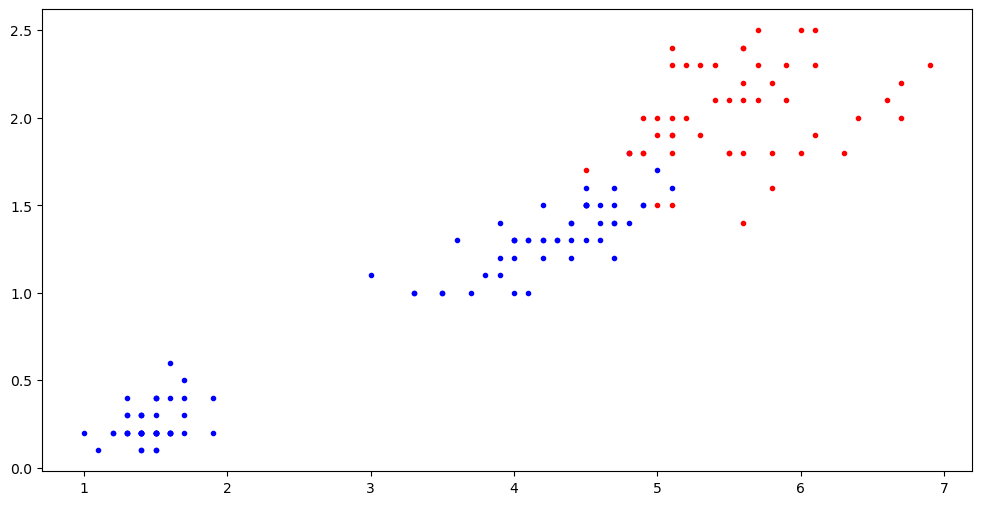

In [87]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:,0][y == 0], X[:,1][y == 0], c="b", marker=".")
plt.scatter(X[:,0][y == 1], X[:,1][y == 1], c="r", marker=".")
plt.show()

In [90]:
# NBGaussian 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X, y)


GaussianNB()

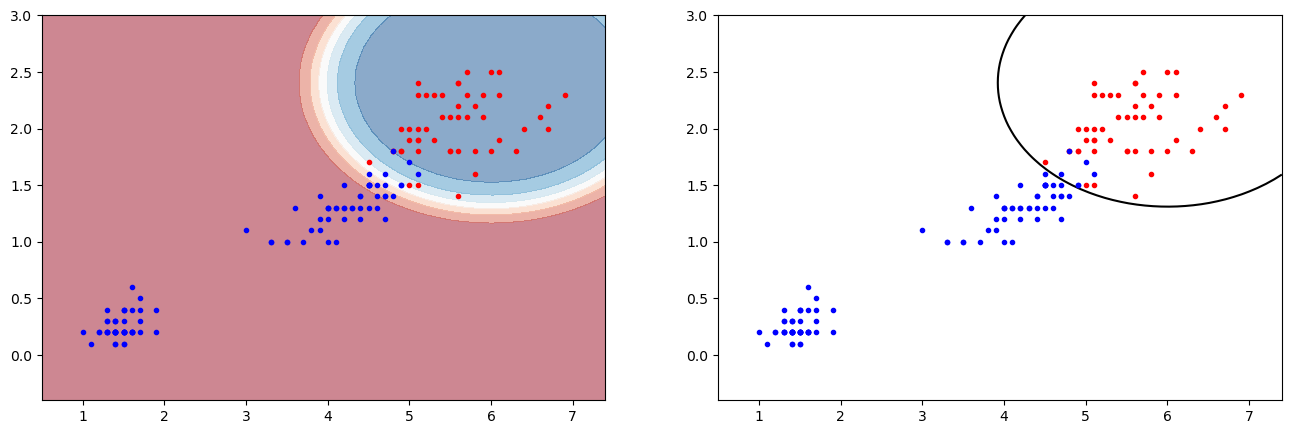

In [91]:
plt.figure(figsize=(16, 5))
plot_decision_boundary(X, y, clf)
plt.show()

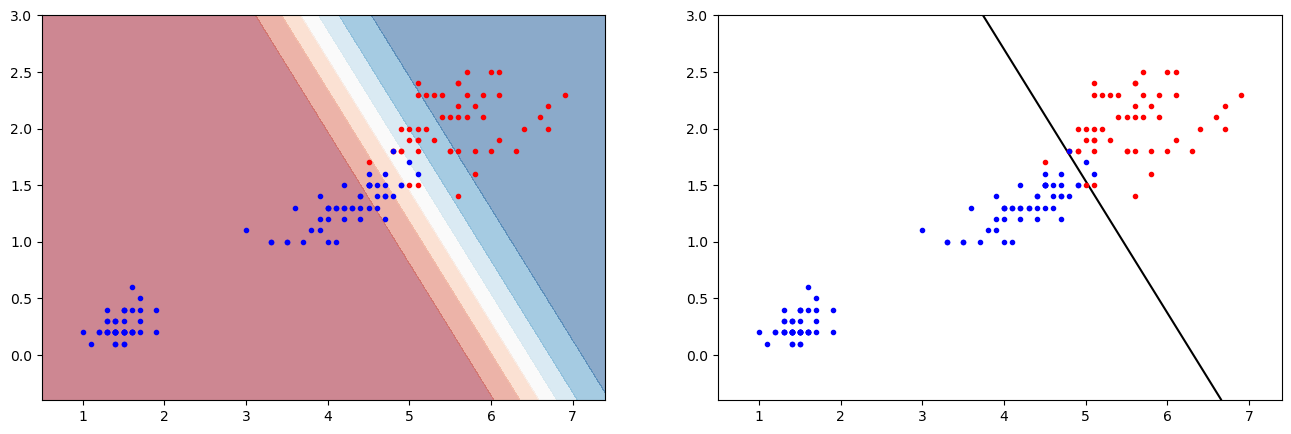

In [92]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

plt.figure(figsize=(16,5))
plot_decision_boundary(X, y, clf)
plt.show()